# TP optimization Subgradient methods

## Antoine HABIS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_breastcancer(filename):
    """
    Cette fonction lit le fichier filename, par exemple
    filename = 'wdbc_M1_B0.data'
    Elle retourne 
    X : une matrice de caracteristiques
    y : un vecteur des classes tel que si y[i] = 1, la tumeur est maligne
        et si y[i] = -1, la tumeur est benigne

    Pour plus d'infos sur la base de donnees,
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29
    """

    data = np.loadtxt(r'C:\Users\Antoine\Downloads\wdbcM1B0 (1).data', delimiter=',')

    # la colonne 0 ne nous interesse pas ici
    y = data[:, 1] * 2 - 1
    X = data[:, 2:]

    # Standardisation de la matrice
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    return X, y


## Question 2.1

$$
\left.
    \begin{array}{ll}
        \xi_i \geq 0, \forall i \in \{1,...,n\} \\
        \xi_i \geq 1-y_i(x_i^{T}v+a), \forall i \in\{1,...,n\}
    \end{array}
\right\}
\iff \xi_i \geq \max (0,1-y_i(x_i^{T}v+a)), \forall i \in \{0,...,n\}
$$

Or comme il est possible d'inverser l'ordre des mins, on commence par minimiser sur les $\xi_i$.


En minimisant au maximum, on égalise la contrainte $\max (0,1-y_i(x_i^{T}v+a))$

On obtient donc le résultat:
    $\min_{v\in \mathbb{R}^m,a\in \mathbb{R}} \frac{1}{2} \sum_{j=1}^{m} v_j^2 +\sum_{i=1}^{n}max(0,1-y_i(x_i^{T}v+a))$




## Question 2.2

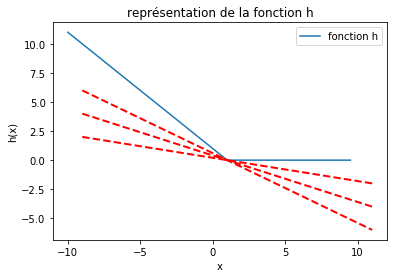

In [2]:
x=np.arange(-10,10,0.5)
y=[]
for i in range (len(x)):
        y.append(max(0,1-x[i]))
plt.plot(x,y,label='fonction h')
plt.plot([-9, 11], [6, -6], 'r--', lw=2)
plt.plot([-9, 11], [4, -4], 'r--', lw=2)
plt.plot([-9, 11], [2, -2], 'r--', lw=2)
plt.title('représentation de la fonction h')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()
plt.show()


On voit bien sur la représentation de h que pour les $x < 1$ la sous différentielle est égale au coeffcient directeur soit $\delta h(x)=\{-1\}$.


Pour les $x>1$, c'est la même chose $\delta h(x)=\{0\}$


Enfin pour $x=0$, On voit bien sur la courbe que toutes les droites passant pas 0 et de coefficient directeur compris dans $[-1,0]$ sont en dessous de h.
Donc pour $x=1$: $\delta h(1)=[-1,0]$

## Question 2.3

Il suffit de prendre $N(v,a)=\frac{1}{2}||v||_2^2$

$M(v,a)=u$ 

u étant un vecteur tel que $u_i=y_i(x_i^Tv+a) \forall i \in \{1,...,n\}$

Cette application est trivialement linéaire (pas multilinéaire mais linéaire à deux variables).

Puis en prenant H tel que:

$H(z)=\sum_{i=1}^p\max(0,1-z_i)$

H et N sont évidement  séparables avec $n_i(v_i)=\frac{1}{2}v_i^2$ et $h(z_i)=\max(0,1-z_i)$



Il suffit maintenant de calculer la sous différentielle:
$\delta H(M(v,a))=\delta h(M(v,a)_1)\times...\times\delta h(M(v,a)_p)$

Or $\forall i \in \{1,...,p\}, \delta h(M(v,a)_i)=M(v,a)_i^T\delta h(M(v,a)_i)$

Donc $\delta f(v,a)= \delta N(v,a) +cM^T\delta H(M(v,a))$


On a $\delta_v N(v,a)=v$ et $\delta_a N(v,a)=0$ donc 

$\delta N(v,a)=\begin{pmatrix} 
v  \\
0 
\end{pmatrix}$

Puis, 

$$\forall u \in \mathbb{R}^{n}, \partial H(u) = \prod_{i = 1}^{n} \partial h(u_{i})$$


Or nous avons déjà calculé précement les dérivées partielles de h

## Question 2.4

In [3]:
X,y=load_breastcancer(r'C:\Users\Antoine\Downloads\wdbcM1B0 (1).data')


n = X.shape[0]
m = X.shape[1]



def f(x,c=1) : 
    v = np.transpose(x[1:])
    X1 = np.hstack((np.ones((n,1)),X))
    
    
    D = np.diag([y[i] for i in range(y.shape[0])])
    Mva = np.dot(D,np.dot(X1,np.transpose(x)))
    
    H_ = np.sum([max([0,1-Mva[i]]) for i in range(n)])
    
    Nva = 0.5*np.sum([v[i]**(2) for i in range(m)])
    
    return Nva+ c*H_


def ss_grad_h(v):
    if v<1:
        return -1
    if v==1:
        return -np.random.random_sample()
    else:
        return 0
    
    
def df(x,c=1) : 
    X1 = np.hstack((np.ones((n,1)),X))
    D = np.diag([y[i] for i in range(y.shape[0])])
    M = np.dot(D,X1)
    Mva = np.dot(M,(np.transpose(x)))
    delta_h_Mva = []
    for i in range(n) : 
        delta_h_Mva.append(ss_grad_h(Mva[i]))
        
    delta_h_Mva = np.array(delta_h_Mva)
    v = np.transpose(x[1:])
    dN = list(v)
    dN.append(0)
      # mise sous forme matricielle
    dN = np.array(dN)
    return dN+ c*np.dot(np.transpose(M),delta_h_Mva)



## Question 2.5

In [4]:
def methode_sous_grad(x0,gamma0) :
    a = x0[0]
    v = x0[1]
    L=[]
    x = np.hstack((a,v.T))
    Xgrad, Ygrad = [],[]
    for i in range(1000) : 
        x -= gamma0*df(x)
        L.append(f(x))
        plt.title("f(x_k) en fonction de la kième itération")
        plt.xlabel('k')
        plt.ylabel('f(x_k)')
    plt.plot(np.arange(len(L)),L,color='k')
    plt.show()
    return(f(x))    

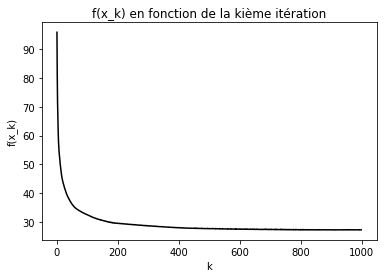

27.17339249081911

In [5]:
L = []
a = 0
v = np.zeros(m)
L.append(a)
L.append(v)
methode_sous_grad(L,0.0005)

## Question 3.1

\begin{align}
E[f_I(v,a)]=\sum_{i=1}^{n} f_i(v,a)\times\frac{1}{n}&=n\times\frac{1}{n}\times\frac{1}{2}||v||_2^2+c\sum_{i=1}^{p} max(0,1-y_i(x_i^Tv+a))\\
&=\frac{1}{2}||v||_2^2+c\sum_{i=1}^{p} max(0,1-y_i(x_i^Tv+a))\\
&=f(v,a)
\end{align}

## Question 3.2

Calculons la sous différentielle de $f_i$:
On note:


$\delta f_{i,interm}(v,a)=\left\{
    \begin{array}{ll}
        \{-1\} \mbox{si } 1-y_i(x_i^Tv+a)<1 \\
        [-1,0]\mbox{si } 1-y_i(x_i^Tv+a)=1 \\
        \{0\} si  1-y_i(x_i^Tv+a)>1
    \end{array}
\right.$



   $ \delta_v f_{i}=v-cny_i x_i  \delta f_{i,interm}(v,a)$
   
   
   $\delta_a f_{i}=-cny_i \delta f_{i,interm}(v,a)$
   
   Donc:
  $ \delta f_{i}=
\begin{pmatrix} 
\delta_v f_{i}  \\
\delta_a f_{i} 
\end{pmatrix}$

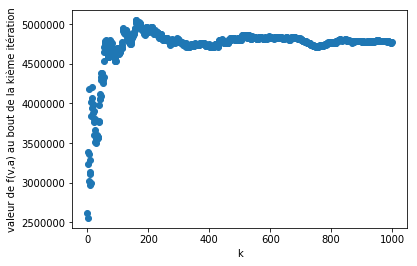

4771161.705107647


(array([-410.91778907, -195.460749  , -420.64423479, -401.78396699,
        -206.91509025, -365.32316421, -417.41964644, -447.57023401,
        -205.33140062,  -24.88173538, -331.87200591,   16.37624643,
        -335.12718667, -321.47493332,    8.64873166, -205.70056431,
        -195.71358695, -275.52222019,   -5.36855316,  -85.62140572,
        -430.64306483, -210.95064673, -439.66752304, -411.72403251,
        -228.9205747 , -344.64605786, -384.23395098, -448.91621561,
        -207.18663431, -188.8721768 ]), 1854.5521474524703)

In [16]:
X,y=load_breastcancer(r'C:\Users\Antoine\Downloads\wdbcM1B0 (1).data')
def gradient_v_gradient_a(v,a):
    i=np.random.randint(len(X))
    V=v-len(X)*y[i]*X[i]*ss_grad_h(y[i]*(np.dot(X[i].T,v)+a))
    A=-len(X)*y[i]*ss_grad_h(y[i]*(np.dot(X[i].T,v)+a))
    return V,A
def method_gradient_stoch(v0,a0):
    v=v0
    a=a0
    L=[]
    for i in range (1000):
        gamma=1/(i+1)
        v -= gamma*gradient_v_gradient_a(v,a)[0]
        a -= gamma*gradient_v_gradient_a(v,a)[1]
        L.append(f(np.append(v,a)))
    plt.scatter(np.arange(len(L)),L)
    plt.ylabel('valeur de f(v,a) au bout de la kième itération')
    plt.xlabel('k')
    plt.show()
    print(f(np.append(v,a)))
    return v,a
method_gradient_stoch(np.zeros(30),0)
    


## Question 4.1


Sa fonction Lagrangienne associée est:
$L(v,a,\phi,\psi)=\frac{1}{2} \sum_{j=1}^{m} v_j^2 +\sum_{i=1}^{n}max(0,1-y_i(x_i	Tv+a))-\sum_{i=1}^{n}\langle \phi_i,\xi_i\rangle+\sum_{i=1}^{n}\langle \psi_i,1-\xi_i-y_i(x_i^Tv+a)\rangle$

## Question 4.2

$1^{er}$ Cas: $x+\frac{\phi}{\rho}>0$:

$g(x,\phi)=-\frac{1}{2\rho}\phi^{2}+\frac{\rho}{2}(x+\frac{\phi}{\rho})^2$

$\nabla_xg(x,\phi)=\frac{\rho}{2}(2x+2\frac{\phi}{\rho})=\rho(x+\frac{\phi}{\rho})$

$\nabla_\phi g(x,\phi)=\frac{-\phi}{\rho} +\frac{\rho}{2}(\frac{2x}{\rho}+\frac{2\phi}{\rho})=x$

$2^{ème}$ Cas:$x+\frac{\phi}{\rho}\leq0$:

$g(x,\phi)=-\frac{1}{2\rho}\phi^{2}$

$\nabla_x g(x,\phi)=0$

$\nabla_\phi g(x,\phi)=-\frac{\phi}{\rho}$


Donc on obtient un formule pour nos deux gradients: à savoir:
$\nabla_x g(x,\phi)=\rho max(0,x+\frac{\phi}{\rho})$ et ,
$\nabla_\phi g(x,\phi)=max(\frac{-\phi}{\rho},x)$

## Question 4.3

Pour $x\leq\frac{-\phi}{\rho}$:

$\nabla_x^{2}g(x,\phi)=0$

$\nabla_\phi^{2}g(x,\phi)=-\frac{1}{\rho}$

Pour $x>\frac{-\phi}{\rho}$:

$\nabla_x^{2}g(x,\phi)=\rho>0$

$\nabla_\phi^{2}g(x,\phi)=0$


Donc la hessienne de $x\rightarrow g(x,\phi)$ est toujours positive (dans $\mathbb{R}$),ainsi $x\rightarrow g(x,\phi)$ est convexe

Puis, la hessienne de $\phi\rightarrow g(x,\phi)$ est toujours negative (dans $\mathbb{R}$),ainsi $\phi\rightarrow g(x,\phi)$ est concave


## Question 4.4

In [ ]:
X,y=load_breastcancer(r'C:\Users\Antoine\Downloads\wdbcM1B0 (1).data')
u=0
def gradient_v(v,a,xi,psi,rho)
    u=0
    for i in range len(X):
        u+=np.transpose(-y[i]X[i])*rho*max(0,-xi[i]+1-y[i]*(np.dot(np.transpos(X[i]),v)+a)+psi[i]/rho)
    return u

def gradient_a(xi,v,a,psi,rho):
    u=0
    for i in range (len(X)):
        u+=-y[i]*rho*max(0,-xi[i]+1-y[i]*(np.dot(np.transpose(X[i]),v)+a)+psi[i]/rho)
    return u

def gradient_xi(xi,phi,psi,v,a,rho):
    u=0
    for i in range (len(X)):
        u+=-np.transpose(np.ones(len(X)))
    